In [ ]:
# RETAIL PRICE PREDICTION PROBLEM
# Data Fields:InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
# Aim is to predict the UnitPrice
# Approaches : EDA for feature analysis,drop unwanted columns,transform,normalize some of the features, outlier handling,add special features(special) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
from xgboost import XGBClassifier                                      
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split   
pd.set_option('display.max_columns',None)

from sklearn.linear_model import LinearRegression 
from sklearn import metrics                             


#ADDED all the required Libraries.


## Data Loading and Cleaning
#doublecheck the current directory
#change directory to 'data'

In [2]:
import os
print(os.getcwd())
os.chdir('./data')
print(os.getcwd())

C:\Users\BLR_01\Pictures\Geyitm\HackM
C:\Users\BLR_01\Pictures\Geyitm\HackM\data


# Read the data.

In [3]:
# Load the dataframe: both initial train and test 
df_train_initial = pd.read_csv('Train.csv',delimiter=',')
df_test_initial =pd.read_csv('Test.csv',delimiter=',')

#find the shapes of initial data
print('Shape of train_initial: ',df_train_initial.shape)
print('Shape of test_initial: ',df_test_initial.shape)


('Shape of train_initial: ', (284780, 8))
('Shape of test_initial: ', (122049, 7))


# Observe the data

In [4]:
# info on train data initial
df_train_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [5]:
# info on test data
df_test_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [6]:
# More views of training data in different ways 
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [7]:
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [8]:

df_test_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.137920,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,54.311646,1711.887591,6.726816
min,0.000000,0.000000,0.000000,-9360.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000


# Exploratory Analysis

In [9]:
df_train_initial['Country'].value_counts().head(10)
#df_train_initial['Country'].value_counts().sort_values(ascending=False).iloc[0:15]

35    253253
14      6653
13      5946
10      5244
30      1776
23      1680
3       1435
32      1293
26      1049
0        883
Name: Country, dtype: int64

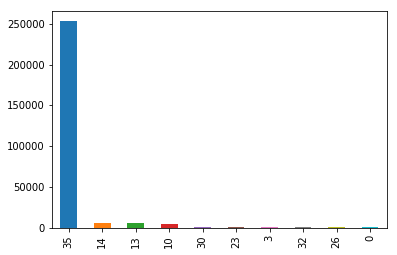

In [10]:
df_train_initial['Country'].value_counts().head(10).plot(kind = 'bar')


In [11]:
#top 25 StockCodes
df_train_initial['StockCode'].value_counts().head(15)

3249    1478
1292    1292
3235    1172
3069     998
170      997
2599     969
1574     852
3683     840
2037     785
1092     774
425      762
172      761
1258     760
2120     732
989      729
Name: StockCode, dtype: int64

In [12]:
# sum o them
df_train_initial['StockCode'].value_counts().head(15).sum()

13901

#There is a good distribution of stock codes - top value is having 1478 occurenances in dataset of about 280K
#nothing to suspect

# Let enhance the dataset with additional date related features
#By inspection we see day_of_week and month have some effect - which is generally the case in any sale
#based on the month values we could also add additional seasonality facters later

In [13]:
#create day_of_week
df_train_initial['day_of_week']=pd.DatetimeIndex(df_train_initial['InvoiceDate']).dayofweek.astype(object)
#note make it as object as we can encode it; we do not want enums
#create month
df_train_initial['month']=pd.DatetimeIndex(df_train_initial['InvoiceDate']).month.astype(object)

In [14]:
df_train_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,4,5
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2,5
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,6,11
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1,11
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,4,5


In [15]:
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


# General Analysis

Text(0,0.5,'UnitPrice')

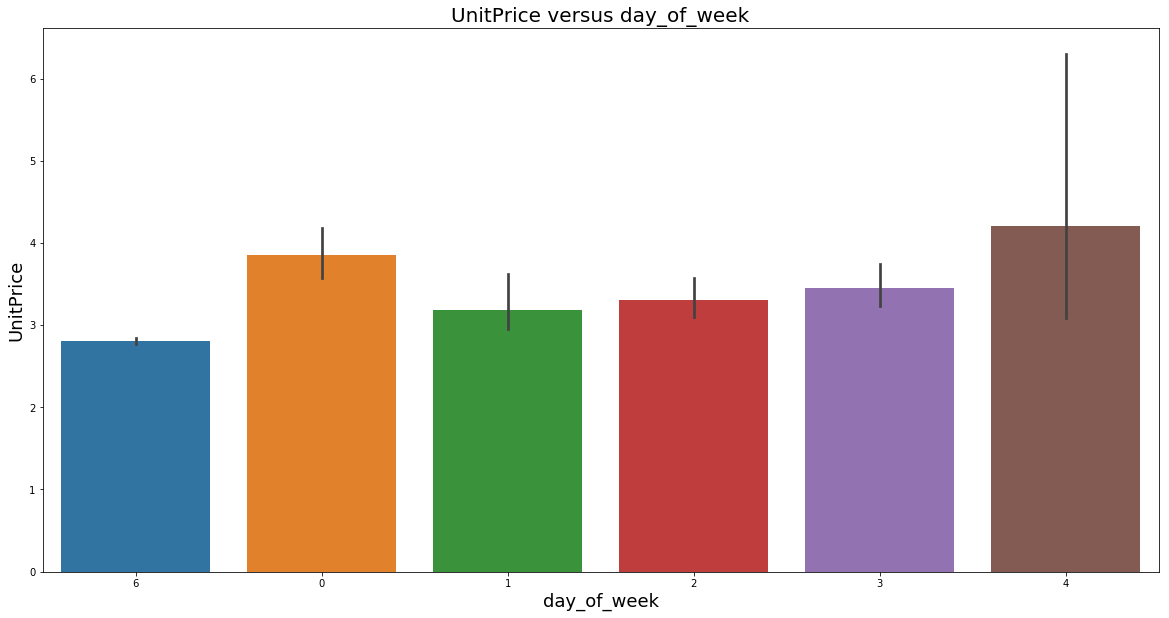

In [16]:
plt.figure(figsize=(20,10))
plt.title('UnitPrice versus day_of_week',fontsize=20)
df_d = df_train_initial.groupby(["day_of_week"])['UnitPrice'].aggregate(np.median).reset_index().sort_values('UnitPrice')
sns.barplot(x='day_of_week', y="UnitPrice", data=df_train_initial, order=df_d['day_of_week'])
plt.xlabel('day_of_week', fontsize=18)
plt.ylabel('UnitPrice', fontsize=18)

In [17]:
# we see a general trend accross even with the complete data.

Text(0,0.5,'UnitPrice')

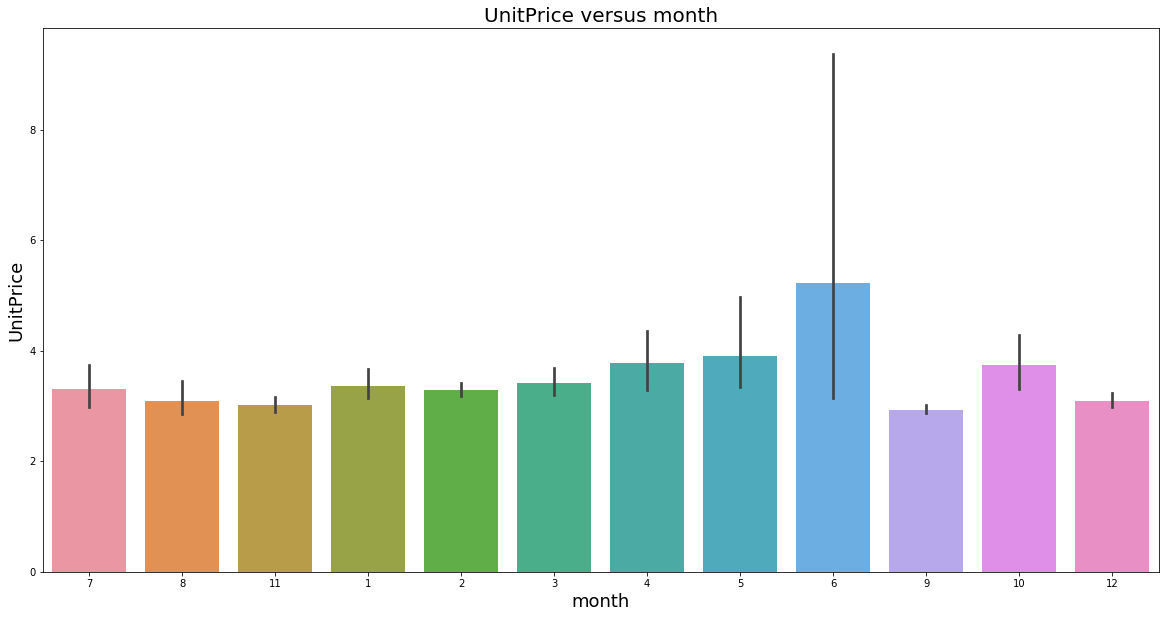

In [18]:
plt.figure(figsize=(20,10))
plt.title('UnitPrice versus month',fontsize=20)
df_stops = df_train_initial.groupby(["month"])['UnitPrice'].aggregate(np.median).reset_index().sort_values('UnitPrice')
sns.barplot(x='month', y="UnitPrice", data=df_train_initial, order=df_stops['month'])
plt.xlabel('month', fontsize=18)
plt.ylabel('UnitPrice', fontsize=18)

In [19]:
# we see changes wrt month.

In [20]:
#Find where quantity is negetive
df_neg_qt=df_train_initial[df_train_initial['Quantity'] < 0]
#df_train_initial['Quantity'].value_counts().sum()

In [21]:
df_neg_qt['Quantity'].value_counts()

-1        2685
-2         908
-3         388
-12        357
-6         324
-4         311
-24        159
-5         130
-10        110
-8          98
-48         62
-7          53
-36         38
-11         36
-100        36
-16         35
-9          34
-20         32
-72         25
-25         24
-18         22
-144        21
-96         17
-40         16
-32         14
-13         13
-120        12
-15         12
-30         11
-50         11
          ... 
-150         1
-186         1
-480         1
-234         1
-334         1
-670         1
-80995       1
-1350        1
-1930        1
-29          1
-58          1
-46          1
-26          1
-37          1
-500         1
-576         1
-624         1
-756         1
-828         1
-840         1
-960         1
-1296        1
-1300        1
-85          1
-31          1
-47          1
-51          1
-75          1
-74215       1
-113         1
Name: Quantity, Length: 112, dtype: int64

In [22]:
df_neg_qt['Quantity'].value_counts().sum()

6167

In [23]:
df_train_initial['Quantity'].value_counts()

 1        51253
 12       42076
 2        40721
 6        26375
 4        22609
 3        18794
 24       16564
 10       14733
 8         8148
 5         5740
 48        4217
 25        3519
 20        3376
 16        2778
-1         2685
 36        2591
 72        1398
 100       1253
 96        1239
 18        1112
 7          932
-2          908
 9          833
 30         752
 40         736
 144        701
 32         699
 50         617
 60         458
 120        403
          ...  
 80995        1
 3906         1
 67           1
-960          1
 832          1
-420          1
 860          1
 94           1
 1394         1
-130          1
 1404         1
 888          1
-300          1
-1930         1
 630          1
-140          1
 116          1
 115          1
 2160         1
-162          1
 1900         1
-150          1
-152          1
-670          1
 98           1
 1120         1
-160          1
-37           1
 95           1
 3186         1
Name: Quantity, Length: 

In [24]:
# The trend is comparable with negetive quatities 
# either we drop them or reverse the sign - they could be cancelled or refund ietms: still relevent for the model

In [25]:
# Observing the negetive distribution we find that they are significant in number and follow the same general trend of 
# increase in numbers as positive values. So we can assume that is a mistake of data entry or some system glitch
# and convert the negetives to positives 

In [26]:
# let analyse top Stockcode - 3249 in all respect
# Make a new data frame
#df_top=df_train_initial(df_train_initial['StockCode'== 3249])
df_top=df_train_initial[df_train_initial['StockCode']== 3249]
df_top.shape

(1478, 10)

In [27]:
 
df_top.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,1478.00000,1478.0,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,8441.32138,3249.0,3704.422192,13.767930,2.891150,15572.636671,34.240189
std,5552.76637,0.0,181.405975,70.771545,0.227983,1618.743672,4.158320
min,0.00000,3249.0,864.000000,-1930.000000,2.550000,12370.000000,0.000000
25%,3642.00000,3249.0,3716.000000,3.000000,2.950000,14240.500000,35.000000
50%,7570.50000,3249.0,3716.000000,6.000000,2.950000,15569.500000,35.000000
75%,12951.75000,3249.0,3716.000000,12.000000,2.950000,16939.500000,35.000000
max,22135.00000,3249.0,3716.000000,1010.000000,5.790000,18283.000000,35.000000


In [28]:
#create a pivot
price_pivot = df_top.pivot_table(values=["UnitPrice"], index=["Country","Quantity"])
print (price_pivot)


                  UnitPrice
Country Quantity           
0        6         2.950000
6        12        2.950000
         72        2.950000
7        10        2.950000
         30        2.950000
         64        2.550000
10      -24        2.950000
         6         2.950000
         12        2.950000
         18        2.950000
         24        2.950000
         32        2.550000
         60        2.550000
         64        2.550000
         96        2.550000
12       6         2.950000
13       8         2.950000
         9         2.950000
17       1         2.950000
18       6         2.950000
         18        2.950000
22       6         2.950000
23       6         2.950000
         12        2.950000
         256       2.550000
26       6         2.950000
         12        2.950000
30       1         2.950000
         2         2.950000
         6         2.950000
...                     ...
35       11        2.950000
         12        2.940805
         13        2

# Observations 
Increase in  order order quantity leads to decrease in size in general # should that be log?
but there are exceptions - ex 1010, 992, 320, 224,128 - all have higher UnitPrice - belong to same customerID - 17450!!!
conversly 300 has base price - different customer ID
quantity above 30 seems to get discount irrespective of the coutrly
country doesn not seem to affect in this particular case


In [29]:
#LEt try similar analysis for another product - midrange
med=df_train_initial['StockCode'].value_counts().median()
med

36.0

# By observation we find that there are are a significant number of negetive values for 'Quantity' 
#and it is having the similar distribution with 'UnitPrice'. So it could be some systemic mistake. we will retain them with positivization.


In [30]:
# Do the same for train data and test data also

In [31]:
df_train_initial['Quantity']=df_train_initial['Quantity'].abs()

In [32]:
df_top['Quantity']=df_top['Quantity'].abs()

In [33]:
df_train_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,4,5
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2,5
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,6,11
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1,11
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,4,5


In [34]:
# observing the data we find that the unitprice is discounted with Quantity. so we will create normalized unitprice - now columm
# and plot normunit price versus Quantity
# we can assume min value as the mode - but need to verify this.

In [35]:
df_train_initial['UnitPrice'].min()

0.0

In [36]:
df_train_initial['UnitPrice'].mode()

0    1.25
dtype: float64

In [37]:
# This suggests there are some values with Zero unit price, that can be dropped.

In [38]:
# ref df_test_onehot=common[common['train']==0]
#df_train_initial[df_train_initial['UnitPrice'] == 0 ].value_counts()#AttributeError: 'DataFrame' object has no attribute 'value_counts'
df_train_initial[df_train_initial['UnitPrice'] == 0 ]['UnitPrice'].value_counts()

0.0    34
Name: UnitPrice, dtype: int64

In [39]:
df_train_initial.shape

(284780, 10)

In [40]:
# Take these out

df_train_initial.drop(df_train_initial[df_train_initial['UnitPrice'] == 0].index, inplace=True )
df_train_initial.shape


(284746, 10)

# Lets continue with the normalizing unitPrice

In [41]:
df_top['NormUnitPrice']=df_top['UnitPrice']/df_top['UnitPrice'].min()

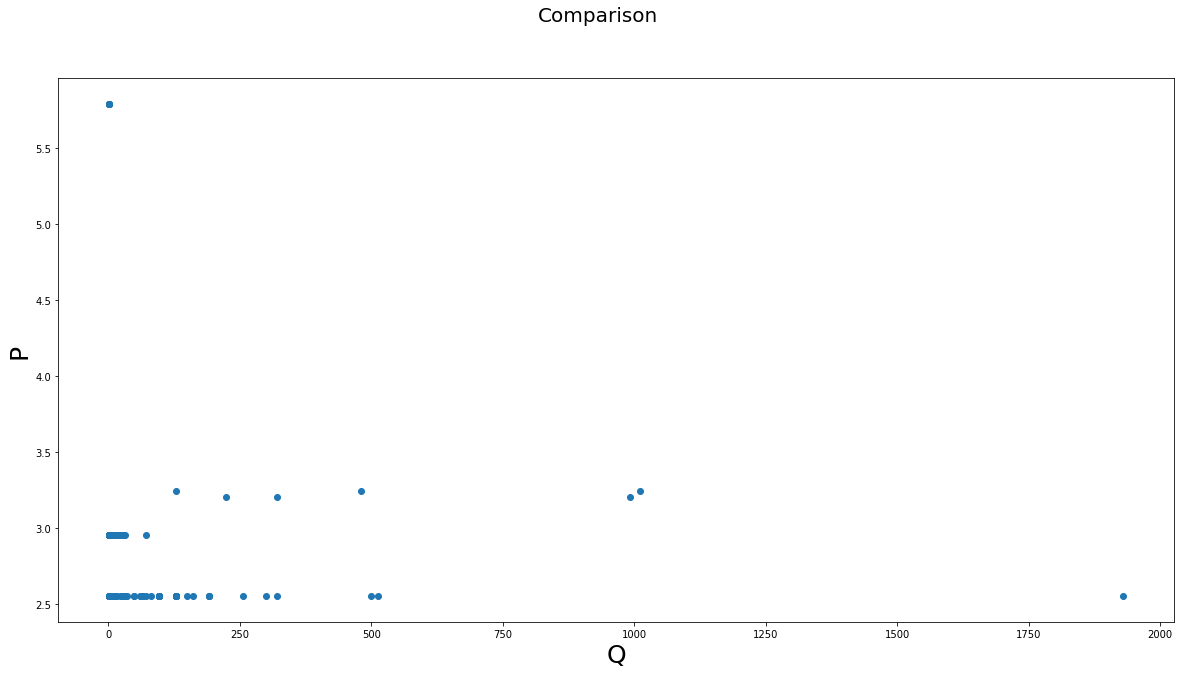

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(df_top['Quantity'],df_top['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

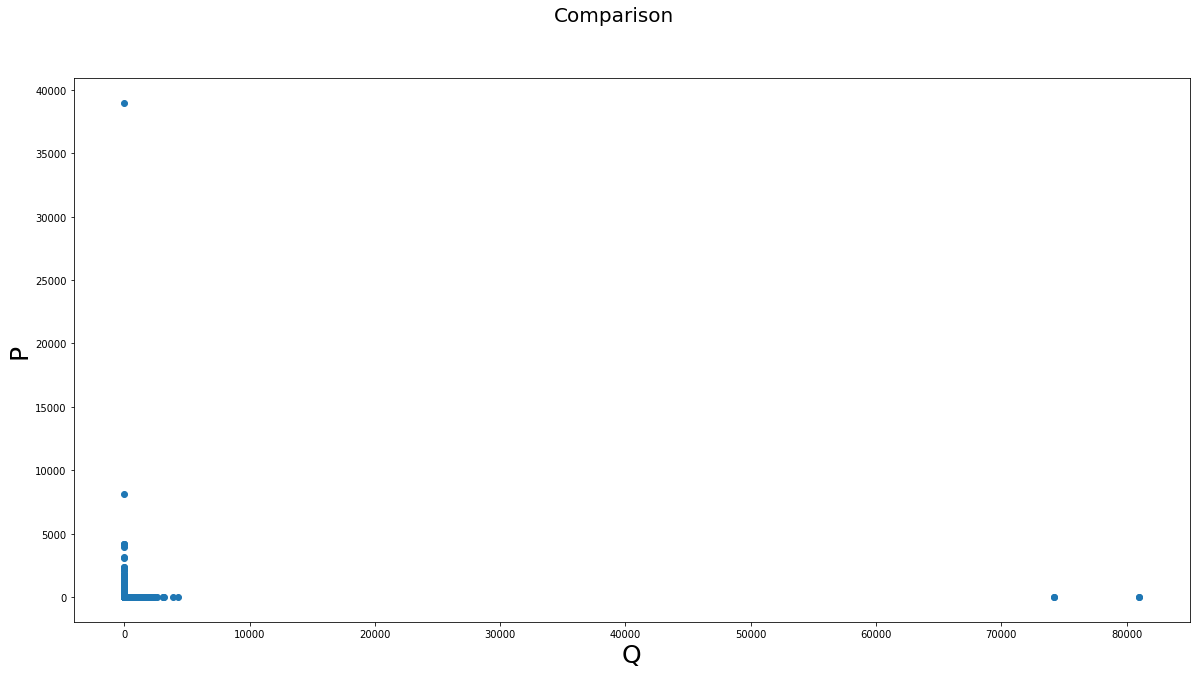

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(df_train_initial['Quantity'],df_train_initial['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

In [44]:
# Need outlier considerations - lets take data set with the stockcode (3681) that has highest unitprice 
df_topprice=df_train_initial[df_train_initial['StockCode']== 3681]
df_topprice.shape

(315, 10)

In [45]:
df_topprice.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,315.000000,315.0,315.0,315.000000,315.000000,315.000000,315.000000
mean,13383.958730,3681.0,2140.0,27.482540,339.988794,15216.171429,32.539683
std,7084.653878,0.0,0.0,149.770553,2271.634850,1859.571702,6.284714
min,95.000000,3681.0,2140.0,1.000000,0.080000,12352.000000,6.000000
25%,6503.000000,3681.0,2140.0,1.000000,0.850000,13237.500000,35.000000
50%,14824.000000,3681.0,2140.0,1.000000,2.950000,15498.000000,35.000000
75%,19931.500000,3681.0,2140.0,3.500000,75.330000,16789.500000,35.000000
max,22187.000000,3681.0,2140.0,1600.000000,38970.000000,18283.000000,35.000000


In [46]:
#Looks like capping the unitprice at 75% values could be best strategy given that we donot have too many of them but few with 
#very high value that have a high potential to skew the entire model


In [47]:
#q1 = df_train_initial['StockCode'== 3681]['UnitPrice'].quantile(0.75) transform(lambda x: x.fillna(x.mean()))
# OR new_column = df.groupby('Grade').Marks.transform('mean') 
df_train_initial['QUnitPrice']=df_train_initial.groupby(['StockCode'])['UnitPrice'].transform(lambda x: x.quantile(0.75))
df_train_initial.loc[df_train_initial['StockCode']==3681].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice
3227,13336,3681,2140,1,2011-10-04 15:21:00,7.95,16374.0,35,1,10,75.33
3271,14937,3681,2140,8,2011-10-28 16:45:00,0.39,14071.0,35,4,10,75.33
3318,5469,3681,2140,18,2011-04-18 13:46:00,0.10,16399.0,35,0,4,75.33
4227,2029,3681,2140,1,2011-01-21 14:51:00,10.00,16210.0,35,4,1,75.33
6362,19934,3681,2140,1350,2011-05-12 15:19:00,0.16,18133.0,35,3,5,75.33


# Add new variable STD price based on the mode for the group

In [48]:
df_train_initial['StdUnitPrice']=df_train_initial.groupby(['StockCode'])['UnitPrice'].transform(lambda x: x.value_counts().index[0])
df_train_initial.loc[df_train_initial['StockCode']==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice,StdUnitPrice
2474,9889,1,1536,12,2011-07-26 13:03:00,0.39,15203.0,35,1,7,0.39,0.39
102532,16917,1,1536,26,2011-11-21 17:04:00,0.39,17629.0,35,0,11,0.39,0.39
110638,16170,1,1536,12,2011-11-14 09:13:00,0.39,14904.0,35,0,11,0.39,0.39
123186,10214,1,1536,12,2011-08-03 08:21:00,0.39,13717.0,35,2,8,0.39,0.39
123515,11778,1,1536,24,2011-09-08 08:56:00,0.39,15298.0,35,3,9,0.39,0.39


In [50]:
#create another variable which says whether the customer is special one depending on StdUnitPrice,
#&(df_train_initial['UnitPrice'] != df_train_initial['QUnitPrice'])
df_train_initial['Special'] = np.where( ((df_train_initial['UnitPrice'] < df_train_initial['StdUnitPrice'])    ), 0, 1)
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,QUnitPrice,StdUnitPrice,Special
count,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000
mean,9955.302909,1573.344388,2023.968368,13.599703,3.451628,15288.365143,32.824524,3.189973,3.000348,0.920087
std,5551.496025,843.581422,1089.828740,294.122660,78.404213,1714.295476,6.742497,11.169955,6.837445,0.271159
min,0.000000,0.000000,0.000000,1.000000,0.001000,12346.000000,0.000000,0.001000,0.001000,0.000000
25%,5069.000000,938.250000,1141.000000,2.000000,1.250000,13954.000000,35.000000,1.250000,1.250000,1.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000,1.950000,1.950000,1.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,3.750000,3.750000,1.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000,1179.585000,849.930000,1.000000


In [53]:
#check one more 
df_train_initial.loc[df_train_initial['StockCode']==20].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice,StdUnitPrice,Special
5192,10994,20,1093,1,2011-08-21 15:17:00,5.95,17059.0,35,6,8,5.95,5.95,1
9148,14579,20,1093,3,2011-10-24 13:06:00,5.95,18240.0,35,0,10,5.95,5.95,1
10155,14487,20,1093,6,2011-10-21 15:20:00,5.95,12712.0,14,4,10,5.95,5.95,1
13899,8718,20,1093,1,2011-06-29 12:59:00,5.95,14606.0,35,2,6,5.95,5.95,1
15535,14016,20,1093,2,2011-10-14 11:08:00,5.95,14796.0,35,4,10,5.95,5.95,1
20128,21979,20,1093,2,2011-11-24 11:16:00,5.95,14410.0,35,3,11,5.95,5.95,1
25009,16202,20,1093,1,2011-11-14 12:47:00,5.95,18117.0,35,0,11,5.95,5.95,1
26675,13936,20,1093,27,2011-10-13 10:23:00,4.95,13777.0,35,3,10,5.95,5.95,0
27834,9849,20,1093,1,2011-07-25 13:57:00,5.95,14796.0,35,0,7,5.95,5.95,1
30020,10012,20,1093,3,2011-07-28 16:03:00,5.95,17071.0,35,3,7,5.95,5.95,1


In [54]:
df_topprice['QUnitPrice']=df_topprice.groupby(['StockCode'])['UnitPrice'].transform(lambda x: x.quantile(0.75))


In [55]:
# WE are good
# lets make it a normalized UnitPrice - will be QunitPrice where UnitPrice is greater or equal to q-75%


In [56]:
df_topprice['UnitPrice']=np.where(df_topprice["UnitPrice"] > df_topprice["QUnitPrice"],df_topprice["QUnitPrice"] ,df_topprice['UnitPrice'])
df_topprice.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice
3227,13336,3681,2140,1,2011-10-04 15:21:00,7.95,16374.0,35,1,10,75.33
3271,14937,3681,2140,8,2011-10-28 16:45:00,0.39,14071.0,35,4,10,75.33
3318,5469,3681,2140,18,2011-04-18 13:46:00,0.10,16399.0,35,0,4,75.33
4227,2029,3681,2140,1,2011-01-21 14:51:00,10.00,16210.0,35,4,1,75.33
6362,19934,3681,2140,1350,2011-05-12 15:19:00,0.16,18133.0,35,3,5,75.33
6418,18867,3681,2140,2,2011-01-06 12:58:00,21.95,15823.0,35,3,1,75.33
6982,13137,3681,2140,3,2011-09-30 12:03:00,1.00,13764.0,35,4,9,75.33
10252,6487,3681,2140,2,2011-05-12 15:26:00,1.95,13263.0,35,3,5,75.33
11225,2699,3681,2140,1,2011-02-09 15:33:00,2.95,17843.0,35,2,2,75.33
11961,14292,3681,2140,1,2011-10-19 11:18:00,75.33,12744.0,29,2,10,75.33


In [58]:
#Do the same thing with the main dataframe
df_train_initial['UnitPrice']=np.where(df_train_initial["UnitPrice"] > df_train_initial["QUnitPrice"],df_train_initial["QUnitPrice"] ,df_train_initial['UnitPrice'])
df_train_initial.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice,StdUnitPrice,Special
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,4,5,3.75,3.75,1
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2,5,1.95,1.95,1
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,6,11,5.95,5.95,1
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1,11,0.83,0.83,1
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,4,5,1.65,1.65,1
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35,6,11,1.65,1.65,1
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35,3,12,1.25,1.25,1
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35,2,11,1.25,1.25,1
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35,2,11,5.75,5.75,1
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35,2,6,2.95,2.95,1


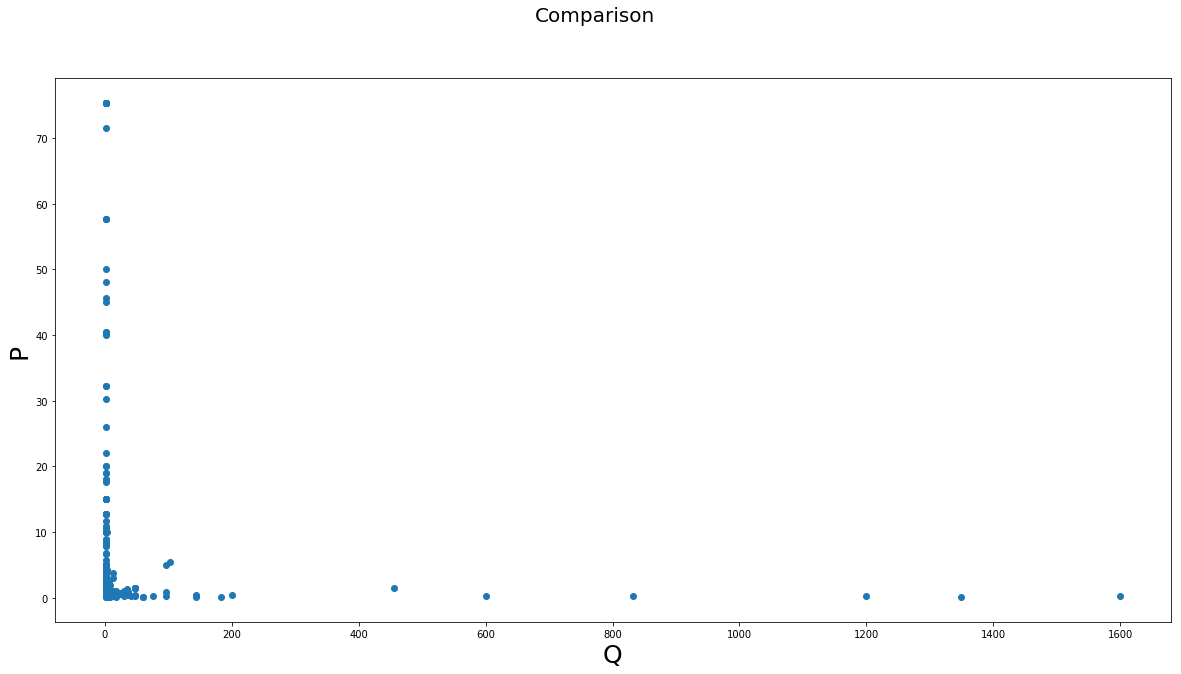

In [59]:
plt.figure(figsize=(20,10))
plt.scatter((df_topprice['Quantity']),df_topprice['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

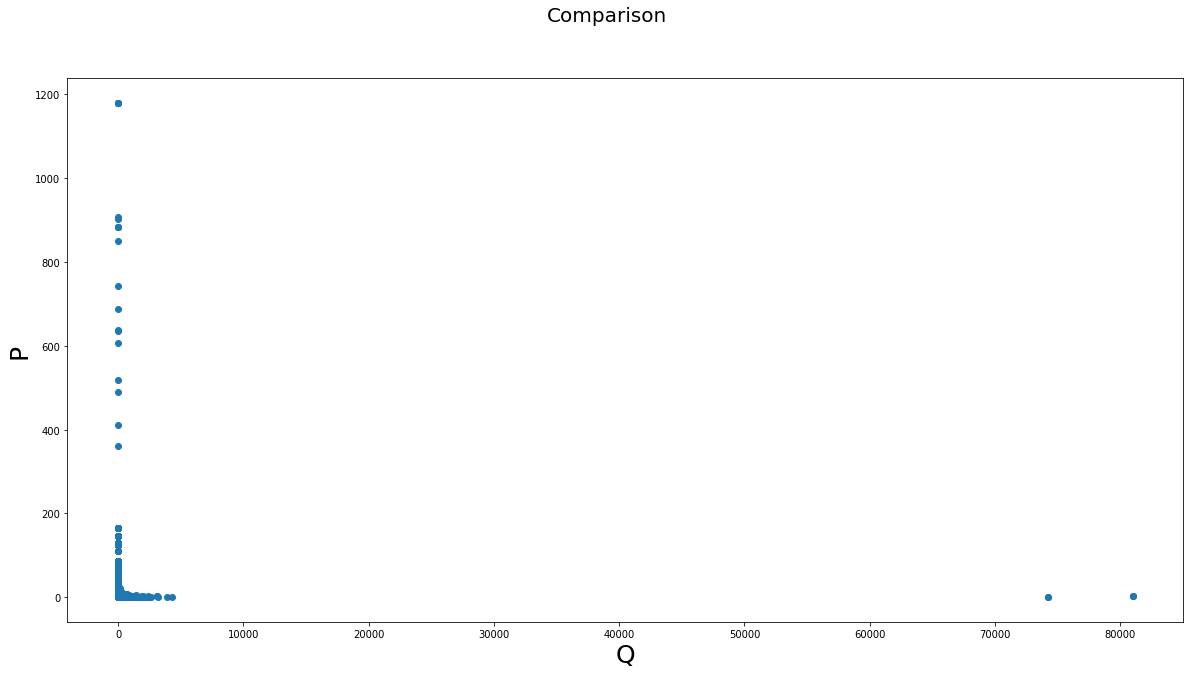

In [60]:
plt.figure(figsize=(20,10))
plt.scatter((df_train_initial['Quantity']),df_train_initial['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

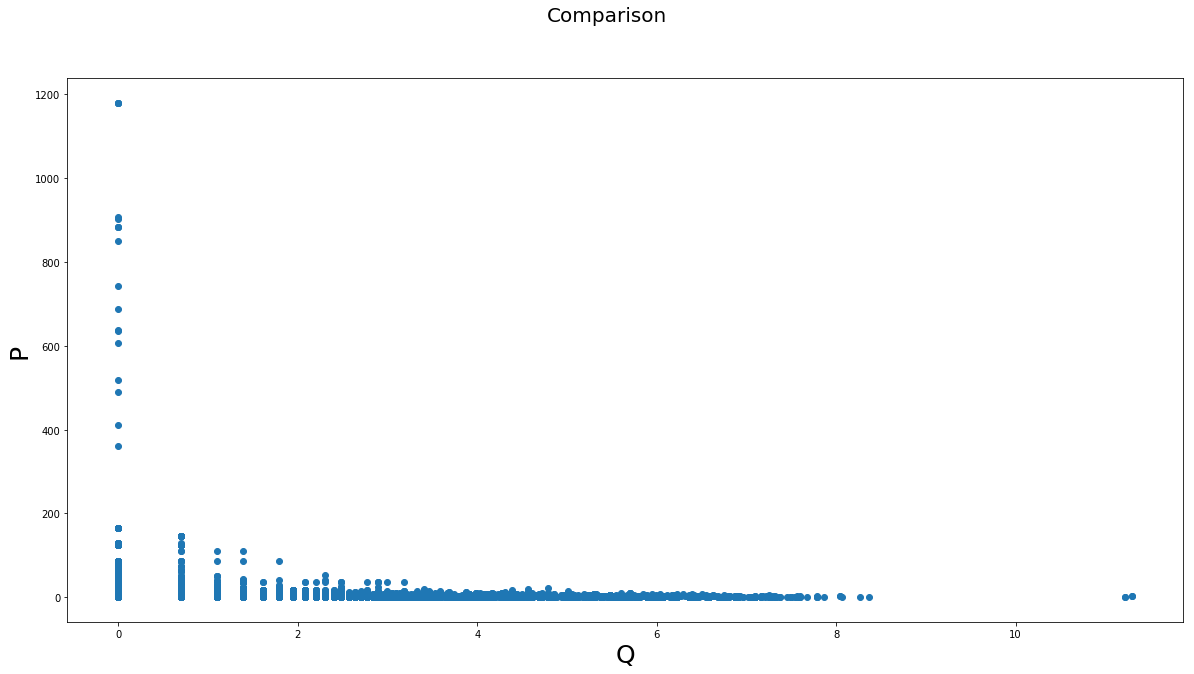

In [61]:
#Let check with log transofrmation
plt.figure(figsize=(20,10))
plt.scatter(np.log(df_train_initial['Quantity']),df_train_initial['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

In [62]:
# looks good, but still we need to cap values at 200 for price and take quantity as log
d=df_train_initial.loc[df_train_initial['UnitPrice'] > 200]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 8863 to 263589
Data columns (total 13 columns):
InvoiceNo       19 non-null int64
StockCode       19 non-null int64
Description     19 non-null int64
Quantity        19 non-null int64
InvoiceDate     19 non-null object
UnitPrice       19 non-null float64
CustomerID      19 non-null float64
Country         19 non-null int64
day_of_week     19 non-null object
month           19 non-null object
QUnitPrice      19 non-null float64
StdUnitPrice    19 non-null float64
Special         19 non-null int32
dtypes: float64(4), int32(1), int64(5), object(3)
memory usage: 2.0+ KB


In [63]:
#As these are just 19 entries, can be ignored 

In [64]:
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,QUnitPrice,StdUnitPrice,Special
count,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000
mean,9955.302909,1573.344388,2023.968368,13.599703,2.993428,15288.365143,32.824524,3.189973,3.000348,0.920087
std,5551.496025,843.581422,1089.828740,294.122660,8.005473,1714.295476,6.742497,11.169955,6.837445,0.271159
min,0.000000,0.000000,0.000000,1.000000,0.001000,12346.000000,0.000000,0.001000,0.001000,0.000000
25%,5069.000000,938.250000,1141.000000,2.000000,1.250000,13954.000000,35.000000,1.250000,1.250000,1.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.850000,15152.000000,35.000000,1.950000,1.950000,1.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,3.750000,3.750000,1.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,1179.585000,18287.000000,36.000000,1179.585000,849.930000,1.000000


In [65]:
#By manual inspection quantities above 1000 can be capped to 1000 as they are very few - about 78 in whole data frame
#we could also try 500 - 291 observations next time
#and also 400 for 448
#and 300 for 570 values

# ALSO need to reduce the dimension for customerid (where Qunitprice=0, we can make it 0) :LATER

In [66]:
df_train_initial['Quantity']=np.where(df_train_initial["Quantity"] > 500,500 ,df_train_initial['Quantity'])
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,QUnitPrice,StdUnitPrice,Special
count,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000
mean,9955.302909,1573.344388,2023.968368,12.093308,2.993428,15288.365143,32.824524,3.189973,3.000348,0.920087
std,5551.496025,843.581422,1089.828740,29.953715,8.005473,1714.295476,6.742497,11.169955,6.837445,0.271159
min,0.000000,0.000000,0.000000,1.000000,0.001000,12346.000000,0.000000,0.001000,0.001000,0.000000
25%,5069.000000,938.250000,1141.000000,2.000000,1.250000,13954.000000,35.000000,1.250000,1.250000,1.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.850000,15152.000000,35.000000,1.950000,1.950000,1.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,3.750000,3.750000,1.000000
max,22188.000000,3683.000000,3895.000000,500.000000,1179.585000,18287.000000,36.000000,1179.585000,849.930000,1.000000


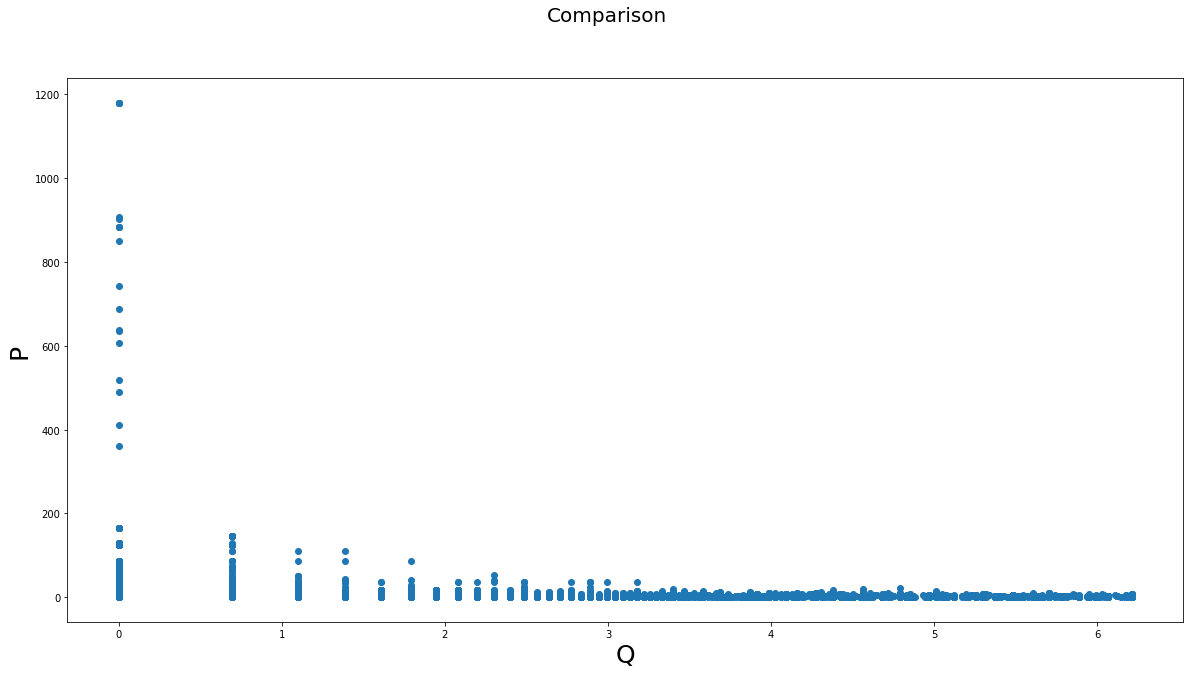

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(np.log(df_train_initial['Quantity']),df_train_initial['UnitPrice'])
plt.suptitle('Comparison', fontsize=20)
plt.xlabel('Q',fontsize=25)
plt.ylabel('P',fontsize=25)
plt.show()

# Lets do all steps for test data also

In [68]:
#create day_of_week
df_test_initial['day_of_week']=pd.DatetimeIndex(df_test_initial['InvoiceDate']).dayofweek.astype(object)
#note make it as object as we can encode it; we do not want enums

In [69]:
#create month
df_test_initial['month']=pd.DatetimeIndex(df_test_initial['InvoiceDate']).month.astype(object)

In [70]:
df_test_initial['Quantity']=df_test_initial['Quantity'].abs()

#LETs add log for Quantity and make new column


In [71]:
df_test_initial['Quantity']=df_test_initial['Quantity'].abs()

In [72]:
df_test_initial['Quantity']=np.where(df_test_initial["Quantity"] > 500,500 ,df_test_initial['Quantity'])
df_test_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.245909,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,31.067330,1711.887591,6.726816
min,0.000000,0.000000,0.000000,1.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,500.000000,18287.000000,36.000000


In [73]:
df_test_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 9 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null object
CustomerID     122049 non-null float64
Country        122049 non-null int64
day_of_week    122049 non-null object
month          122049 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 8.4+ MB


In [74]:
df_test_initial['LogQuantity']=np.sqrt(df_test_initial['Quantity'])
df_test_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,day_of_week,month,LogQuantity
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,1,2,1.732051
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,2,12,1.000000
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,1,10,6.000000
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,0,6,1.414214
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,6,11,1.000000


In [75]:
# MISSED FOR TRAIN data
df_train_initial['LogQuantity']=np.sqrt(df_train_initial['Quantity'])
df_train_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice,StdUnitPrice,Special,LogQuantity
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,4,5,3.75,3.75,1,1.732051
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2,5,1.95,1.95,1,2.449490
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,6,11,5.95,5.95,1,2.000000
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1,11,0.83,0.83,1,1.000000
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,4,5,1.65,1.65,1,3.464102


In [76]:
# We see that one row is reduced

In [77]:
df_train_initial.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_week,month,QUnitPrice,StdUnitPrice,Special,LogQuantity
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,4,5,3.75,3.75,1,1.732051
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2,5,1.95,1.95,1,2.449490
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,6,11,5.95,5.95,1,2.000000
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1,11,0.83,0.83,1,1.000000
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,4,5,1.65,1.65,1,3.464102


Text(0.5,1,'Correlation matrix')

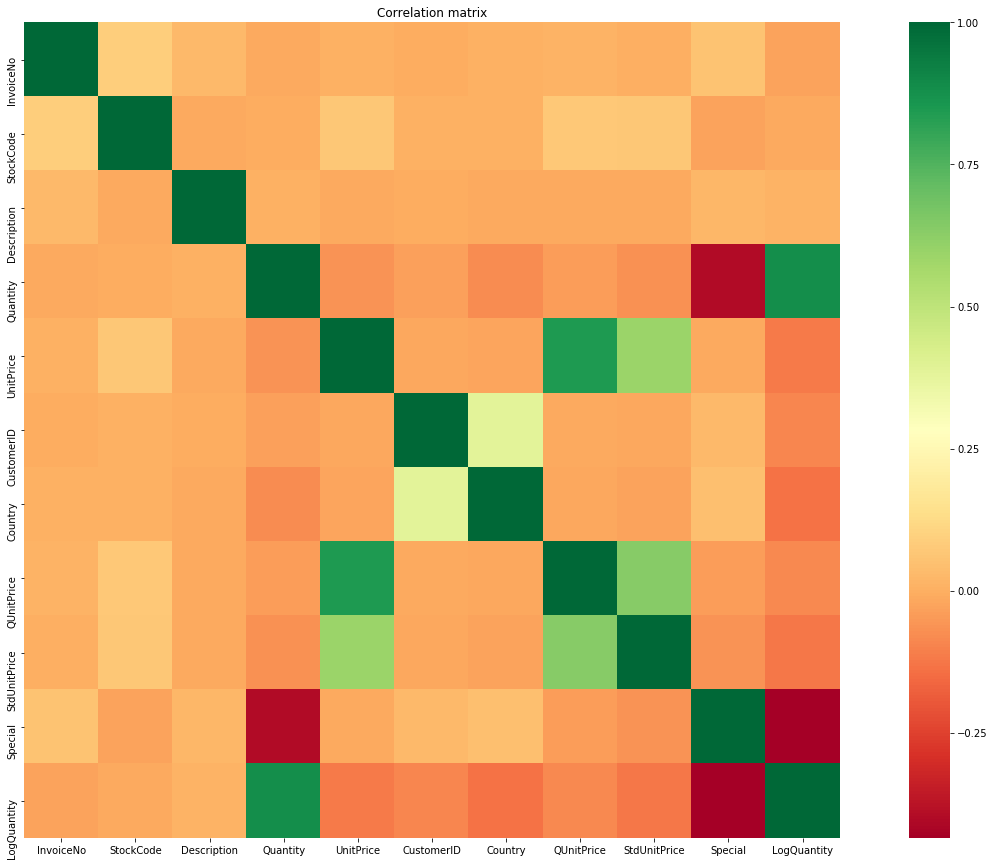

In [78]:
plt.figure(figsize=(25,15))
title = 'Correlation matrix'
sns.heatmap(df_train_initial.corr(), square=True, cmap='RdYlGn')
plt.title(title)

In [79]:
# price has correlation with quantity and logQuantity
# customer id has correlation with country - customers are distributed. but not much relation to price. so country

#  End of test data pre-processing; we have train and test columns same except the target variable 'UnitPrice'


# MAke RUN specific changes now

In [81]:
# create a transitional copy 
df_train_initial_temp=df_train_initial.copy(deep=True) # will continue with df_train_one
df_test_initial_temp=df_test_initial.copy(deep=True)   # will continue with df_test_one  

In [82]:
df_train_initial_temp.drop(['InvoiceNo','Description','Quantity','InvoiceDate','QUnitPrice','StdUnitPrice','LogQuantity'],axis=1,inplace=True)
df_test_initial_temp.drop(['InvoiceNo','Description','Quantity','InvoiceDate','LogQuantity'],axis=1,inplace=True)

In [83]:
df_train_one=df_train_initial_temp.copy(deep=True) # will continue with df_train_one
df_test_one=df_test_initial_temp.copy(deep=True)   # will continue with df_test_one  

In [84]:
#modelling
# we will try first with label encoding and then with one hot encoding [combining test and training sets]
df_train_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284746 entries, 0 to 284779
Data columns (total 7 columns):
StockCode      284746 non-null int64
UnitPrice      284746 non-null float64
CustomerID     284746 non-null float64
Country        284746 non-null int64
day_of_week    284746 non-null object
month          284746 non-null object
Special        284746 non-null int32
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 16.3+ MB


In [87]:
# LABEL encoding

In [88]:
#Create the label encoded data
#Initializing lable encoder
le = LabelEncoder()

#Code that auto encodes any dataframe column of type category or object.        
columnsToEncode = list(df_train_one.select_dtypes(include=['object']))
print(' '.join(columnsToEncode))
#Initializing Label Encoder
le = LabelEncoder()

#Iterating through each of the categorical columns and label encoding them
for feature in columnsToEncode:
    try:
        df_train_one[feature] = le.fit_transform(df_train_one[feature])
    except:
        print('Error encoding '+feature)

day_of_week month


In [89]:
# check encoded columns
df_train_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284746 entries, 0 to 284779
Data columns (total 7 columns):
StockCode      284746 non-null int64
UnitPrice      284746 non-null float64
CustomerID     284746 non-null float64
Country        284746 non-null int64
day_of_week    284746 non-null int64
month          284746 non-null int64
Special        284746 non-null int32
dtypes: float64(2), int32(1), int64(4)
memory usage: 16.3 MB


In [90]:
# Do the same thing for test data as well

In [91]:
#Iterating through each of the categoerical columns and label encoding them
for feature in columnsToEncode:
    try:
        df_test_one[feature] = le.fit_transform(df_test_one[feature])
    except:
        print('Error encoding '+feature)

In [92]:
# continue with modelling however - Option 1 [LABEL encoding trin ,test seperately] 
# break x,y 
X= df_train_one.drop("UnitPrice",axis=1)
Y=df_train_one["UnitPrice"]

In [93]:
#create linear regression model
lin_reg = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
#predict Y
Y_predict=lin_reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [95]:
df_predicted.head(10)


,Actual,Predicted
0,2.0,3.0
1,5.0,3.0
2,2.0,3.0
3,2.0,2.0
4,0.0,3.0
5,4.0,3.0
6,4.0,4.0
7,1.0,4.0
8,2.0,2.0
9,1.0,2.0


In [96]:
df_predicted.describe()

,Actual,Predicted
count,85424.000000,85424.000000
mean,2.990319,2.984325
std,6.908786,0.681740
min,0.000000,1.000000
25%,1.000000,3.000000
50%,2.000000,3.000000
75%,4.000000,3.000000
max,1180.000000,6.000000


In [97]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))


RMSE 6.88


In [98]:
# MODEL 1 observations
# The predicted values are all higher
# RMSE is quite high
# Both could be because the higher values of outliers dragging all the values higher side

# Now lets try to improve our model 
# Lets try one hot encoding - inlcuding both traing and test data 

In [99]:
df_train_two=df_train_initial_temp.copy(deep=True) # make another  copy
df_test_two=df_test_initial_temp.copy(deep=True) # make another  copy

In [100]:
df_train_two.shape

(284746, 7)

In [101]:
df_test_two.shape

(122049, 5)

In [103]:
# Do one-hot-encoding combining test and train data and splitting back
Y_train=df_train_two['UnitPrice']

In [104]:
df_train_two['train']=1
df_test_two['train']=0

In [105]:
common = pd.concat([df_train_two, df_test_two]) # axis =0 by default - rows added


In [106]:
#common.info()

In [107]:
#combined=pd.get_dummies()
common = pd.get_dummies(common, columns=['day_of_week','month'], drop_first=True)

In [108]:
#common.head()

In [109]:
# break them back as train and test data 
df_train_two_onehot=common[common['train']==1]

In [110]:
#df_train_two_onehot.info()

In [111]:
df_test_two_onehot=common[common['train']==0]

In [112]:
df_test_two_onehot.shape

(122049, 22)

In [113]:
# drop price from test
df_test_two_onehot.drop(['UnitPrice'],axis=1,inplace=True)

In [114]:
df_test_two_onehot.shape

(122049, 21)

In [115]:
# Extract X,Y again from new train dataset
X= df_train_two_onehot.drop("UnitPrice",axis=1)
Y=df_train_two_onehot['UnitPrice']

In [116]:
#X.info()

In [117]:
#create linear regression model
lin_reg = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
#predict Y
Y_predict=lin_reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [119]:
df_predicted.describe()

,Actual,Predicted
count,85424.000000,85424.000000
mean,2.990319,2.990565
std,6.908786,0.693187
min,0.000000,1.000000
25%,1.000000,3.000000
50%,2.000000,3.000000
75%,4.000000,3.000000
max,1180.000000,6.000000


In [120]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,3.0
2,2.0,3.0
3,2.0,2.0
4,0.0,3.0
5,4.0,3.0
6,4.0,4.0
7,1.0,4.0
8,2.0,2.0
9,1.0,3.0


In [121]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


# Same result for one hot encoding as in Label encoding

# RMSE values are  high and predictions are not close
#one option is to use scalar
#but before that lets try cross-validation and see if it improves the score

# check with cross validation 


In [122]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv = LinearRegression()


# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[ -33.5733951   -70.66034427  -37.58391853  -21.58840808  -43.19252322
  -47.1448713   -84.78011862 -116.67152047  -90.75001167  -91.19191321]
('Mean:', -63.713702446314834)
('Std:', 29.738835583333426)
('RMSE', 7.982086346708787)


# check with 5 splits for cv


In [123]:
# Trial with 5  folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create a model 
modelonecv = LinearRegression()

# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))
print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[ -52.1175727   -29.59258293  -45.1689097  -100.73028593  -90.97283505]
('Mean:', -63.7164372629987)
('Std:', 27.40772914739101)
('RMSE', 7.982257654510953)


# The value of RMSE is not changed with reducing splits to 5 for CV


# Lets do some Ridge Analysis

In [124]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
#reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

In [125]:
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
reg.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [126]:
#predict Y
Y_predict=reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [127]:
df_predicted.describe()

,Actual,Predicted
count,85424.000000,85424.000000
mean,2.990319,2.990565
std,6.908786,0.693187
min,0.000000,1.000000
25%,1.000000,3.000000
50%,2.000000,3.000000
75%,4.000000,3.000000
max,1180.000000,6.000000


In [128]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,3.0
2,2.0,3.0
3,2.0,2.0
4,0.0,3.0
5,4.0,3.0
6,4.0,4.0
7,1.0,4.0
8,2.0,2.0
9,1.0,3.0


In [129]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


In [130]:
# Try with alpha = 0.3

In [131]:
reg_pt3 = linear_model.Ridge(alpha=.3)


In [132]:
reg_pt3.fit(X_train, Y_train)


Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
#predict Y
Y_predict=reg_pt3.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [134]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


In [135]:
# Try with alpha = 0.3

In [136]:
reg_pt7 = linear_model.Ridge(alpha=.7)


In [137]:
reg_pt7.fit(X_train, Y_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
#predict Y
Y_predict=reg_pt7.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [139]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


# Let us stop Ridge here and continue with RandomForestRegressor

In [140]:
reg_rf1=RandomForestRegressor()

In [141]:
reg_rf1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [142]:
#predict Y
Y_predict=reg_rf1.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [143]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1.34


In [144]:
# Hyperparameter tuning for Random forest
reg_rf1=RandomForestRegressor()

In [145]:
#submission = pd.DataFrame(Y_predict,columns=['Price'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)

In [146]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv1 = RandomForestRegressor()

# Train and evaluate multiple models using kfolds
resultsone1 = cross_val_score(modelonecv1, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone1))))

[ -52.1175727   -29.59258293  -45.1689097  -100.73028593  -90.97283505]
('Mean:', -63.7164372629987)
('Std:', 27.40772914739101)
('RMSE', 3.63682846644996)


In [147]:
modelonecv1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [148]:
#untest
#predict Y
Y_predict=modelonecv1.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [149]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,2.0
1,5.0,5.0
2,2.0,2.0
3,2.0,2.0
4,0.0,0.0
5,4.0,4.0
6,4.0,4.0
7,1.0,1.0
8,2.0,2.0
9,1.0,1.0


In [150]:
df_predicted.describe()

,Actual,Predicted
count,85424.000000,85424.000000
mean,2.990319,2.990237
std,6.908786,6.836881
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,1180.000000,1152.000000


In [151]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1.05


In [152]:
#submission = pd.DataFrame(Y_predict,columns=['Price'])
          #submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)

In [153]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [154]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [155]:
#predict Y
Y_predict=model.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [156]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,5.0
2,2.0,3.0
3,2.0,2.0
4,0.0,2.0
5,4.0,3.0
6,4.0,3.0
7,1.0,3.0
8,2.0,2.0
9,1.0,2.0


In [157]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 3.95


In [158]:
from sklearn.ensemble import GradientBoostingRegressor 
gbrt=GradientBoostingRegressor(n_estimators=100)

In [159]:
gbrt.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [160]:
#predict Y
Y_predict=gbrt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [161]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,5.0
2,2.0,3.0
3,2.0,2.0
4,0.0,2.0
5,4.0,3.0
6,4.0,3.0
7,1.0,3.0
8,2.0,2.0
9,1.0,2.0


In [162]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 3.90


In [163]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
lbrt=LGBMRegressor()


In [164]:
gbrt.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [165]:
#predict Y
Y_predict=gbrt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [166]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,5.0
2,2.0,3.0
3,2.0,2.0
4,0.0,2.0
5,4.0,3.0
6,4.0,3.0
7,1.0,3.0
8,2.0,2.0
9,1.0,2.0


In [167]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 3.86


In [168]:
from catboost import CatBoostRegressor

In [169]:
cbt=CatBoostRegressor()
cbt.fit(X_train, Y_train)
#predict Y
Y_predict=cbt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

0:	learn: 8.8578887	total: 245ms	remaining: 4m 4s
1:	learn: 8.7702469	total: 314ms	remaining: 2m 36s
2:	learn: 8.6909926	total: 379ms	remaining: 2m 5s
3:	learn: 8.6150626	total: 444ms	remaining: 1m 50s
4:	learn: 8.5411801	total: 525ms	remaining: 1m 44s
5:	learn: 8.4631221	total: 655ms	remaining: 1m 48s
6:	learn: 8.3875860	total: 780ms	remaining: 1m 50s
7:	learn: 8.3152355	total: 889ms	remaining: 1m 50s
8:	learn: 8.2470516	total: 1s	remaining: 1m 50s
9:	learn: 8.1824718	total: 1.1s	remaining: 1m 49s
10:	learn: 8.1233001	total: 1.21s	remaining: 1m 49s
11:	learn: 8.0660578	total: 1.31s	remaining: 1m 48s
12:	learn: 8.0115611	total: 1.41s	remaining: 1m 46s
13:	learn: 7.9619658	total: 1.53s	remaining: 1m 47s
14:	learn: 7.9047053	total: 1.67s	remaining: 1m 49s
15:	learn: 7.8816372	total: 1.77s	remaining: 1m 48s
16:	learn: 7.8310739	total: 1.85s	remaining: 1m 47s
17:	learn: 7.7835810	total: 1.95s	remaining: 1m 46s
18:	learn: 7.7448602	total: 2.06s	remaining: 1m 46s
19:	learn: 7.7031381	total: 

158:	learn: 6.6783196	total: 16.2s	remaining: 1m 25s
159:	learn: 6.6755926	total: 16.3s	remaining: 1m 25s
160:	learn: 6.6749966	total: 16.4s	remaining: 1m 25s
161:	learn: 6.6741331	total: 16.5s	remaining: 1m 25s
162:	learn: 6.6723524	total: 16.5s	remaining: 1m 24s
163:	learn: 6.6713437	total: 16.6s	remaining: 1m 24s
164:	learn: 6.6690173	total: 16.7s	remaining: 1m 24s
165:	learn: 6.6686568	total: 16.8s	remaining: 1m 24s
166:	learn: 6.6655672	total: 16.8s	remaining: 1m 23s
167:	learn: 6.6649152	total: 16.9s	remaining: 1m 23s
168:	learn: 6.6642188	total: 17s	remaining: 1m 23s
169:	learn: 6.6631283	total: 17s	remaining: 1m 23s
170:	learn: 6.6616722	total: 17.1s	remaining: 1m 22s
171:	learn: 6.6609388	total: 17.2s	remaining: 1m 22s
172:	learn: 6.6592554	total: 17.2s	remaining: 1m 22s
173:	learn: 6.6584125	total: 17.3s	remaining: 1m 22s
174:	learn: 6.6578056	total: 17.4s	remaining: 1m 21s
175:	learn: 6.6568636	total: 17.4s	remaining: 1m 21s
176:	learn: 6.6562415	total: 17.5s	remaining: 1m 2

316:	learn: 6.5370905	total: 28.4s	remaining: 1m 1s
317:	learn: 6.5365401	total: 28.5s	remaining: 1m 1s
318:	learn: 6.5360335	total: 28.5s	remaining: 1m
319:	learn: 6.5350852	total: 28.6s	remaining: 1m
320:	learn: 6.5348569	total: 28.7s	remaining: 1m
321:	learn: 6.5343023	total: 28.7s	remaining: 1m
322:	learn: 6.5340732	total: 28.8s	remaining: 1m
323:	learn: 6.5339009	total: 28.9s	remaining: 1m
324:	learn: 6.5336957	total: 29s	remaining: 1m
325:	learn: 6.5334829	total: 29s	remaining: 60s
326:	learn: 6.5332960	total: 29.1s	remaining: 59.9s
327:	learn: 6.5328127	total: 29.2s	remaining: 59.7s
328:	learn: 6.5323920	total: 29.2s	remaining: 59.6s
329:	learn: 6.5321606	total: 29.3s	remaining: 59.5s
330:	learn: 6.5312204	total: 29.4s	remaining: 59.3s
331:	learn: 6.5310750	total: 29.4s	remaining: 59.2s
332:	learn: 6.5303503	total: 29.5s	remaining: 59.1s
333:	learn: 6.5296372	total: 29.6s	remaining: 58.9s
334:	learn: 6.5293390	total: 29.6s	remaining: 58.8s
335:	learn: 6.5291644	total: 29.7s	rema

478:	learn: 6.4732608	total: 40s	remaining: 43.5s
479:	learn: 6.4729280	total: 40.1s	remaining: 43.5s
480:	learn: 6.4726591	total: 40.2s	remaining: 43.3s
481:	learn: 6.4723961	total: 40.2s	remaining: 43.2s
482:	learn: 6.4722334	total: 40.3s	remaining: 43.2s
483:	learn: 6.4721294	total: 40.4s	remaining: 43s
484:	learn: 6.4715598	total: 40.4s	remaining: 42.9s
485:	learn: 6.4710588	total: 40.5s	remaining: 42.9s
486:	learn: 6.4708677	total: 40.6s	remaining: 42.8s
487:	learn: 6.4705874	total: 40.6s	remaining: 42.6s
488:	learn: 6.4703934	total: 40.7s	remaining: 42.6s
489:	learn: 6.4702437	total: 40.8s	remaining: 42.5s
490:	learn: 6.4701410	total: 40.9s	remaining: 42.4s
491:	learn: 6.4700949	total: 40.9s	remaining: 42.3s
492:	learn: 6.4700597	total: 41s	remaining: 42.2s
493:	learn: 6.4699246	total: 41.1s	remaining: 42.1s
494:	learn: 6.4696907	total: 41.1s	remaining: 42s
495:	learn: 6.4695476	total: 41.2s	remaining: 41.9s
496:	learn: 6.4694651	total: 41.3s	remaining: 41.8s
497:	learn: 6.469180

639:	learn: 6.4351299	total: 51.9s	remaining: 29.2s
640:	learn: 6.4348337	total: 52s	remaining: 29.1s
641:	learn: 6.4346002	total: 52.1s	remaining: 29s
642:	learn: 6.4345237	total: 52.2s	remaining: 29s
643:	learn: 6.4341855	total: 52.3s	remaining: 28.9s
644:	learn: 6.4341114	total: 52.4s	remaining: 28.8s
645:	learn: 6.4337975	total: 52.5s	remaining: 28.8s
646:	learn: 6.4335999	total: 52.6s	remaining: 28.7s
647:	learn: 6.4335002	total: 52.7s	remaining: 28.6s
648:	learn: 6.4333024	total: 52.9s	remaining: 28.6s
649:	learn: 6.4325725	total: 53s	remaining: 28.5s
650:	learn: 6.4324466	total: 53s	remaining: 28.4s
651:	learn: 6.4323514	total: 53.1s	remaining: 28.3s
652:	learn: 6.4322773	total: 53.2s	remaining: 28.2s
653:	learn: 6.4322205	total: 53.2s	remaining: 28.2s
654:	learn: 6.4317661	total: 53.3s	remaining: 28.1s
655:	learn: 6.4317031	total: 53.4s	remaining: 28s
656:	learn: 6.4315394	total: 53.4s	remaining: 27.9s
657:	learn: 6.4310609	total: 53.5s	remaining: 27.8s
658:	learn: 6.4309990	to

800:	learn: 6.4088818	total: 1m 4s	remaining: 16.1s
801:	learn: 6.4087795	total: 1m 4s	remaining: 16s
802:	learn: 6.4087243	total: 1m 4s	remaining: 15.9s
803:	learn: 6.4086763	total: 1m 5s	remaining: 15.9s
804:	learn: 6.4086442	total: 1m 5s	remaining: 15.8s
805:	learn: 6.4083620	total: 1m 5s	remaining: 15.7s
806:	learn: 6.4083369	total: 1m 5s	remaining: 15.6s
807:	learn: 6.4081732	total: 1m 5s	remaining: 15.5s
808:	learn: 6.4081521	total: 1m 5s	remaining: 15.4s
809:	learn: 6.4077146	total: 1m 5s	remaining: 15.4s
810:	learn: 6.4076674	total: 1m 5s	remaining: 15.3s
811:	learn: 6.4073642	total: 1m 5s	remaining: 15.2s
812:	learn: 6.4071218	total: 1m 5s	remaining: 15.1s
813:	learn: 6.4070757	total: 1m 5s	remaining: 15s
814:	learn: 6.4070212	total: 1m 5s	remaining: 14.9s
815:	learn: 6.4068584	total: 1m 5s	remaining: 14.9s
816:	learn: 6.4067557	total: 1m 5s	remaining: 14.8s
817:	learn: 6.4067047	total: 1m 6s	remaining: 14.7s
818:	learn: 6.4066662	total: 1m 6s	remaining: 14.6s
819:	learn: 6.40

958:	learn: 6.3899960	total: 1m 16s	remaining: 3.25s
959:	learn: 6.3897501	total: 1m 16s	remaining: 3.17s
960:	learn: 6.3896618	total: 1m 16s	remaining: 3.09s
961:	learn: 6.3895572	total: 1m 16s	remaining: 3.01s
962:	learn: 6.3894888	total: 1m 16s	remaining: 2.93s
963:	learn: 6.3892673	total: 1m 16s	remaining: 2.85s
964:	learn: 6.3889027	total: 1m 16s	remaining: 2.77s
965:	learn: 6.3884915	total: 1m 16s	remaining: 2.69s
966:	learn: 6.3884703	total: 1m 16s	remaining: 2.62s
967:	learn: 6.3884388	total: 1m 16s	remaining: 2.54s
968:	learn: 6.3883117	total: 1m 16s	remaining: 2.46s
969:	learn: 6.3882624	total: 1m 16s	remaining: 2.38s
970:	learn: 6.3882232	total: 1m 16s	remaining: 2.3s
971:	learn: 6.3881962	total: 1m 16s	remaining: 2.22s
972:	learn: 6.3881577	total: 1m 17s	remaining: 2.14s
973:	learn: 6.3881384	total: 1m 17s	remaining: 2.06s
974:	learn: 6.3881169	total: 1m 17s	remaining: 1.98s
975:	learn: 6.3879956	total: 1m 17s	remaining: 1.9s
976:	learn: 6.3877429	total: 1m 17s	remaining: 1

In [170]:
df_predicted.head(10)

,Actual,Predicted
0,2.0,3.0
1,5.0,5.0
2,2.0,3.0
3,2.0,2.0
4,0.0,2.0
5,4.0,3.0
6,4.0,3.0
7,1.0,3.0
8,2.0,3.0
9,1.0,2.0


In [171]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 5.99


In [172]:
#submission = pd.DataFrame(Y_predict,columns=['UnitPrice'])
#submission.to_csv('../data/submission.csv',index=False)

In [173]:
#df_train_initial['UnitPrice'].unique()

In [174]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=1.0)


In [175]:
las.fit(X_train, Y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [176]:
#predict Y
Y_predict=las.predict(X_test)


In [177]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


In [178]:
ela = linear_model.ElasticNet(alpha=1.0,max_iter=1000)

In [179]:
ela.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [180]:
#predict Y
Y_predict=ela.predict(X_test)


In [181]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 6.88


In [182]:
df_train_initial.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,QUnitPrice,StdUnitPrice,Special,LogQuantity
count,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000,284746.000000
mean,9955.302909,1573.344388,2023.968368,12.093308,2.993428,15288.365143,32.824524,3.189973,3.000348,0.920087,2.763090
std,5551.496025,843.581422,1089.828740,29.953715,8.005473,1714.295476,6.742497,11.169955,6.837445,0.271159,2.111553
min,0.000000,0.000000,0.000000,1.000000,0.001000,12346.000000,0.000000,0.001000,0.001000,0.000000,1.000000
25%,5069.000000,938.250000,1141.000000,2.000000,1.250000,13954.000000,35.000000,1.250000,1.250000,1.000000,1.414214
50%,10310.000000,1521.000000,1987.000000,5.000000,1.850000,15152.000000,35.000000,1.950000,1.950000,1.000000,2.236068
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000,3.750000,3.750000,1.000000,3.464102
max,22188.000000,3683.000000,3895.000000,500.000000,1179.585000,18287.000000,36.000000,1179.585000,849.930000,1.000000,22.360680


In [ ]:
df_train_initial.to_csv('../data/withspecial.csv')

In [ ]:
# Results : 
MODEL                                    RMSE             Description
---------------------------------------------------------------------------------
LinearRegression                          6.88            Label Encoded
LinearRegression                          6.88            One-hot Encoded
LinearRegression                          7.98            One-hot Encoded, CV=10
LinearRegression                          7.98            One-hot Encoded, CV=5
RidgeRegression                           6.88            alpha=0.5        
RidgeRegression                           6.88            alpha=0.7        
*RandomForestRegressor                    1.34            Default parameters [Winner] 
RandomForestRegressor                     3.63            Kfold nsplit=10
XGBRegressor                              3.95            Default parameters
GradientBoostingRegressor                 3.90            n_estimators=100
LGBMRegressor                             3.85            Default parameters
CatBoostRegressor                         5.99            Default parameters
ElasticNet                                6.88            alpha=1.0,max_iter=1000
